In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import scipy.constants as scipy_constants


### Simulation parameters
minS = 50
maxS = 200

m_Z = 92.1876
gamma_Z = 2.4952

nPoints = int(5E7)
##########################


324358
324358


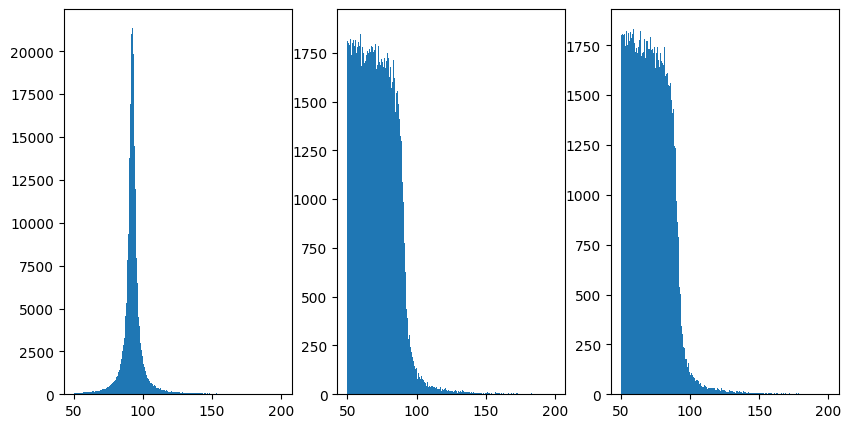

In [16]:
def BreitWigner(s, m, gamma):
    prob = (1/gamma/np.pi)*gamma**2/((s-m)**2+gamma**2)
    return prob
    


def generateCandidateEnergy(nPoints):


    #We generate energies and random x (0-1)
    s=rd.uniform(minS,maxS,nPoints)
    x=rd.random(nPoints)
    
    #Get the probabilities and the mask to filter:
    p=BreitWigner(s,m_Z, gamma_Z)
    mask=x<p
    eventsEnergy=s[mask]
    
    return eventsEnergy



def generateCandidateMomenta(energy):
    
    partition=rd.random(len(energy))
    print(len(partition))
    print(len(energy))
    E_availiable=energy-1.2
    
    p4_electron=np.array(E_availiable)*np.array(partition)
    p4_positron=E_availiable-p4_electron
    
    return  p4_electron, p4_positron

def generateEvents(nPoints):
    energy = generateCandidateEnergy(nPoints)
    data = generateCandidateMomenta(energy)
    return data

def invMass(p4):

    return m


energies=generateCandidateEnergy(nPoints)
p4_electron, p4_positron = generateCandidateMomenta(energies)

fig, ax = plt.subplots(1,3,figsize=(10,5))

ax[0].hist(energies,bins=np.linspace(50,200,300))
ax[1].hist(p4_electron, bins=np.linspace(50,200,300))
ax[2].hist(p4_positron, bins=np.linspace(50,200,300))
plt.show()

In [91]:
%%time


p4_electron, p4_positron = generateEvents(nPoints)
m = invMass(p4_electron + p4_positron)
print("Generated {} events for {} tries.".format(m.shape[0], nPoints))
print("Generation Efficiency: {:3.2f}".format(float(m.shape[0])/nPoints))

...
pass

NameError: name 'p4_electron' is not defined